In [1]:
import tree
import tree_plotter

In [2]:
my_dataset, labels = tree.create_dataset()
print(my_dataset)
print(labels)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
['no surfacing', 'flippers']


In [3]:
tree.cal_shannon_ent(my_dataset)

0.9709505944546686

In [4]:
# Add a third class to make the dataset messier
my_dataset[0][-1] = 'maybe'
tree.cal_shannon_ent(my_dataset)

1.3709505944546687

In [5]:
my_dataset, labels = tree.create_dataset()
tree.split_data_set(my_dataset, 0, 1)

array([[1, 'yes'],
       [1, 'yes'],
       [0, 'no']], dtype=object)

In [6]:
tree.split_data_set(my_dataset, 0, 0)

array([[1, 'no'],
       [1, 'no']], dtype=object)

In [7]:
tree.choose_best_feature_to_split(my_dataset)

0

In [8]:
# create an example tree
my_dataset, labels = tree.create_dataset()
my_tree = tree.create_tree(my_dataset, labels)
my_tree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [9]:
# Pre-define some trees for covenience
tree_plotter.retreve_tree(0)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [10]:
tree_plotter.retreve_tree(1)

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [11]:
tree_plotter.get_num_leafs(tree_plotter.retreve_tree(0))

3

In [12]:
tree_plotter.get_tree_depth(tree_plotter.retreve_tree(0))

2

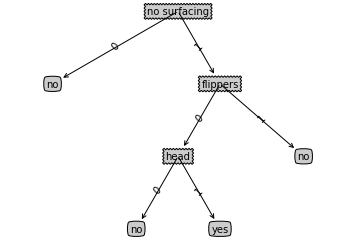

In [13]:
# Visualise the decision tree
tree_plotter.create_plot(tree_plotter.retreve_tree(1))

In [14]:
# Change data_loc to dir where the lense data file is saved
data_loc = r'C:\Users\gao_x\OneDrive\tensorflow_study\machine_learning_in_action\data'
file_name = 'lenses.txt'

In [15]:
# read and parse the lense data file
with open(data_loc + '/' + file_name) as file:
    lense_data = [line.strip().split('\t') for line in file.readlines()]

In [16]:
# Labels of the lense features
lense_feature_labels = ['age', 'prescript', 'astigmatic', 'tearRate']

In [17]:
# Create the decision tree for lense dataset
lense_tree = tree.create_tree(lense_data, lense_feature_labels)
print(lense_tree)

{'tearRate': {'normal': {'astigmatic': {'no': {'age': {'pre': 'soft', 'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}}, 'young': 'soft'}}, 'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses', 'presbyopic': 'no lenses', 'young': 'hard'}}, 'myope': 'hard'}}}}, 'reduced': 'no lenses'}}


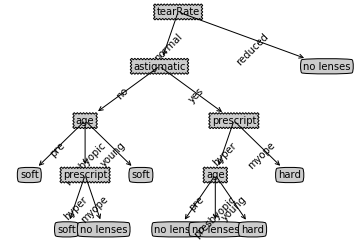

In [18]:
tree_plotter.create_plot(lense_tree)

In [19]:
tree.save_tree(lense_tree, 'lense_tree.pickle')